In [0]:
#참고: https://jaehyeongan.github.io/2019/03/26/KERAS-FUNCTIONAL-API-MULTI-INPUT-모델-구축하기/
#참고: https://keras.io/ko/getting-started/functional-api-guide/
from keras import models, layers
from keras.layers import Input, Dense
#import keras

def multi_input_lstm_embedding_model(timesteps, columns_size, max_words, max_len):
	# lstm model
	lstm_input = layers.Input(shape=(timesteps, columns_size))
	lstm_out = layers.LSTM(64, dropout=0.3, recurrent_dropout=0.3)(lstm_input)
	lstm_model = Model(inputs=lstm_input, outputs=lstm_out)

	# embedding model 
	embed_input = layers.Input(shape=(None,))
	embed_out = layers.Embedding(max_words, 8, input_length=max_len)(embed_input)
	embed_out = layers.Bidirectional(layers.LSTM(64, dropout=0.3, recurrent_dropout=0.3))(embed_out)
	embed_model = Model(inputs=embed_input, outputs=embed_out)

	# concatenate
	concatenated = layers.concatenate([lstm_model.output, embed_model.output])
	concatenated = layers.Dense(32, activation='relu')(concatenated)
	concatenated = layers.BatchNormalization()(concatenated)
	concat_out = layers.Dense(2, activation='sigmoid')(concatenated)

	concat_model = models.Model([lstm_input, embed_input], concat_out)

	return concat_model

## model define
timesteps = 1
columns_size = 10
max_words = 100
max_len = 50
concat_model = multi_input_lstm_embedding_model(timesteps, columns_size, max_words, max_len)
concat_model.summary()

#concat_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model fit
# concat_model.fit([df_label_train, pad_train], target_train
# 				epochs=7, batch_size=32,
# 				callbacks=callbacks_list,
# 				validation_data=([sequence_test, pad_test], target_test),
# 				shuffle=False)	# because of time-series





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 1, 10)        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 8)        800         input_2[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 64)           19200       input_1

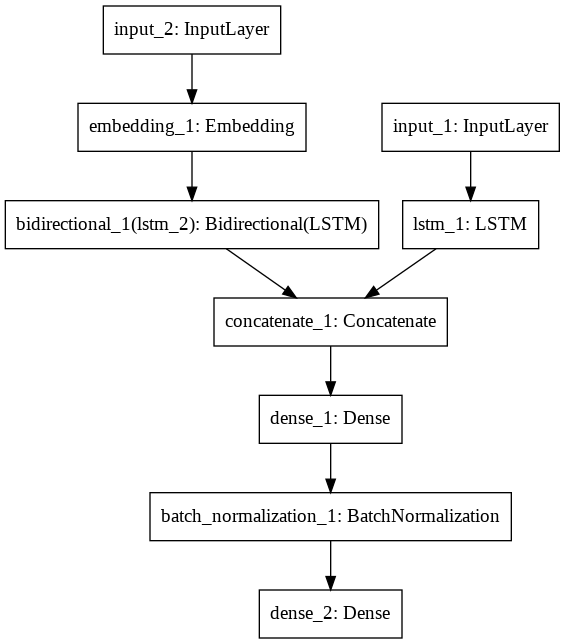

In [0]:
#https://keras.io/ko/visualization/
from keras.utils import plot_model
plot_model(concat_model, to_file='model.png')

In [0]:
#autiencoder
#https://hwiyong.tistory.com/100
import keras 

encoder_input = keras.Input(shape=(28, 28, 1), name='original_img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)
encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

decoder_input = keras.Input(shape=(16,), name='encoded_img')
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)
decoder = keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name='autoencoder')
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_6 (Glob (None, 16)                0   

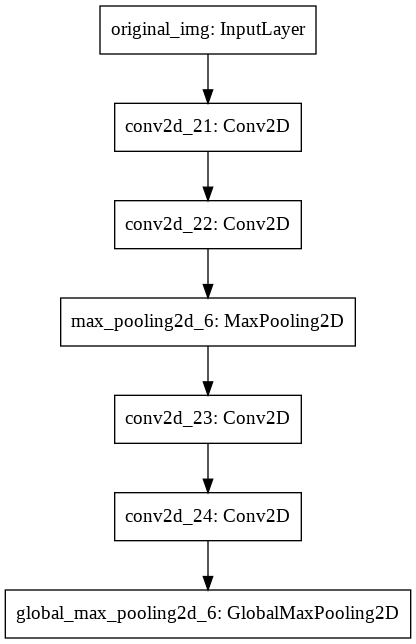

In [0]:
plot_model(encoder, to_file='encoder.png')

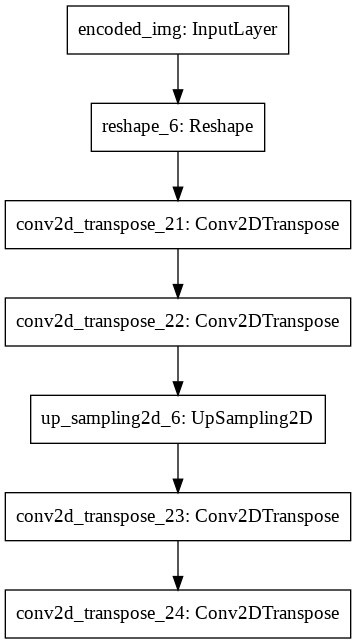

In [0]:
plot_model(decoder, to_file='decoder.png')

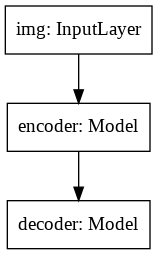

In [0]:
plot_model(autoencoder, to_file='autoencoder.png')

In [0]:
#앙상블..
def get_model():
  inputs = keras.Input(shape=(128,))
  outputs = layers.Dense(1, activation='sigmoid')(inputs)
  return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)
ensemble_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 128)          0                                            
__________________________________________________________________________________________________
model_8 (Model)                 (None, 1)            129         input_10[0][0]                   
__________________________________________________________________________________________________
model_9 (Model)                 (None, 1)            129         input_10[0][0]                   
__________________________________________________________________________________________________
model_10 (Model)                (None, 1)            129         input_10[0][0]                   
___________________________________________________________________________________________

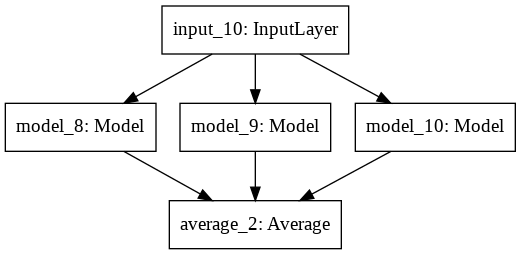

In [0]:
plot_model(ensemble_model, to_file='ensemble_model.png')